# Table of contents
0. [Introduction](0-Introduction.ipynb)
1. [Variables](1-Variables.ipynb)
2. [Data structures](2-Data-Structures.ipynb)
3. [Conditional statements and loops](3-Conditional-Statements-Loops.ipynb)
4. [Some exercises](4-Some-Exercises.ipynb) $\leftarrow$
5. [Introduction to functions](5-0-Introduction-function.ipynb)
    1. [File manipulation](5-1-File-manipulation.ipynb)
6. [From 0D to 1D](6-1-From-0D-to-1D.ipynb)
    1. [Adding lateral diffusion](6-2-Adding-lateral-diffusion.ipynb)
7. [From 1D to 2D](7-From-1D-to-2D.ipynb)
8. [Playing with the model](8-Playing-with-the-model.ipynb)

## 4. Some exercises
---
Now, you should have enough to go through a small batch of exercises 🥳 🥳 🥳.

They might be a bit hard, but that's normal, please don't hesitate to ask us if you have any trouble understanding something.

The answers are still accessible using the `answer` function with the number of the question as an argument.
Also, for some of the following questions, hints are available, run the command `hint(<question_number>)` to access the hint. For example, for a hint for question 3, you can run `hint(3)`.

Moreover, you will need a bit of help for the next exercises so we wrote some functions that will be useful.
We will describe how they work and how to use them.
To load the said function, please run the line below.

Note: If you feel like it, you can try to implement these functions yourself.

In [12]:
try:
    from centuri_course.utils import da_alone, da, di, plot_concentration_1cell
    from centuri_course import answer, hint, answer_results
except ImportError:
    %pip install centuri_course
    from centuri_course.utils import da_alone, da, di, plot_concentration_1cell
    from centuri_course import answer, hint, answer_results

Moreover, we need the parameters described earlier, even though it might not be necessary, we rewrite them here for commodity

In [16]:
mu_a = 2.8e-4
mu_i = 5e-3
tau = 0.1
k = -0.005
size = 100
dx = dy = 2.0 / size
T = 9.0
dt = 0.001
n = int(T / dt)

### "Small" exercise that does not count

Write a loop that computes the sum of the even numbers between 0 and 30.

In [10]:
# Write the loop here
stop = 30
i = 0
sum = 0
# while i <= stop:
#     sum += i
#     i += 2

# for i in range(31):
#     if i % 2 == 0:
#         sum += i

for i in range(0, 31, 2):
    sum += i
print(sum)

240


Before creating a working 2D Turing pattern, let work out how to make the concentration within a given cell change over time according to the function we defined earlier.

### Exercise 3
Write a loop that increments the concentration value of the concentration `a` according to the function `da_alone`.

The function `da_alone` implements the change of concentration ($\delta a$) according to $a$, $\delta t$ and $k$:

$$\delta a = \delta t (a - a^3 +k)$$

`da_alone` takes as parameters the initial concentration value $a$ (`a`), the $\delta t$ parameter (`dt`) and the $k$ parameter (`k`) and outputs the differential of concentration $\delta a$ for that specific initial concentration.

We are looking at the evolution of the concentration of $a$ over time and that our equation gives us the change of $a$ over a time $\delta t$

In [20]:
a_t = 0.01
# Write here the code necessary
for _ in range(n):
    da_dt = da_alone(a_t, dt, k)
    
    a_t_dt = a_t + da_dt
    a_t = a_t_dt

a = a_t
print(f"{a                             = }")
print("Expected value (for a = 0.01) : 0.9971706727639877")

a                             = 0.9971706727639877
Expected value (for a = 0.01) : 0.9971706727639877


### Exercise 3 (bonus)
If you feel like it, you can write the function `da_alone`.

For a solution you can type `da_alone??` to have access to its implementation.

In [23]:
da_alone??

Signature: da_alone(a, dt, k)
Source:   
def da_alone(a, dt, k):
    """
    Computes the change of concentration given an initial concentration `a`,
    a time increment `dt` and a constant `k`. Note that there is no `i` in
    the equation since it is supposed to be `a` alone.

    Args:
        a (float): The initial concentration value
        dt (float): the time increment
        k (float): the constant k

    Returns:
        (float): the change of concentration
    """
    return dt * (a - a**3 + k)
File:      ~/miniforge3/envs/centuri-course-2024/lib/python3.10/site-packages/centuri_course/utils.py
Type:      function

### Exercise 4
Now we have access to the last value of the concentration but we would like to be able to access all the values in order to plot them.

To do so, write a piece of code that stores all the intermediary results in a list.

In [40]:
# A = [0.01]
import numpy as np
A = np.zeros(n+1)
A[0] = 0.01
for t in range(n):
    a_t = A[t]
    a_t_dt = a_t + da_alone(a_t, dt, k)
    # A.append(a_t_dt)
    A[t+1] = a_t_dt

print(f"Last value of A (A[-1])           --> {A[-1]}")
print("Expected value (for A[-1] = 0.01) --> 0.9971706727639877")

Last value of A (A[-1])           --> 0.9971706727639877
Expected value (for A[-1] = 0.01) --> 0.9971706727639877


Given the list of concentrations, one can plot its evolution over time using the function `plot_concentration_1cell`:

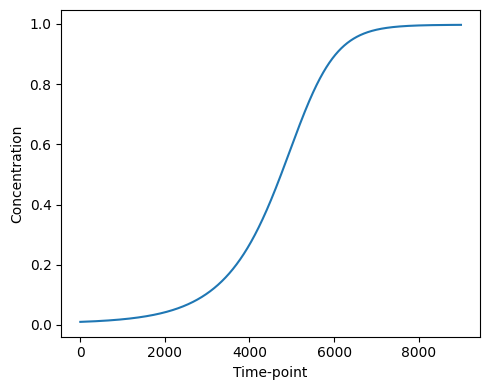

In [41]:
plot_concentration_1cell(A)

### Exercise 5
Now that we know how to compute the evolution of a given concentration, we want to compute the co-evolution of an activator and its inhibitor.

To do so we can use the functions `da` and `di` that implements the following equations:

$$\delta a = \delta t(a-a^3-i+k)$$
$$\delta i = \frac{\delta t}{\tau}(a -i)$$
Note that the function `da` is slightly different to `da_alone` since it incorporates the inhibitor action $-i$.

The function `da` takes as an input the original concentration $a$ (`a`), the time increment parameter $\delta t$ (`dt`), the constant $k$ (`k`) as for the function `da_alone` but also the original inhibitor concentration $i$ (`i`).

The function `di` takes as an input the original concentration $i$ (`i`), the time increment parameter $\delta t$, the constant $\tau$ (`tau`) and the original activator concentration $a$ (`a`).

**Write code to store in two lists the evolution of the concentrations of the activator and the inhibitor.**

In [50]:
A = [0.4]
I = [0.15]
# Write the code here
# print("For the starting values of A[0]=0.4 and I[0]=0.15:")
# print(f"Last value of A --> {A[-1]}")
# print("Expected value  --> 0.17217946292184916")
# print(f"Last value of I --> {I[-1]}")
# print("Expected value  --> 0.1733148395515316")

Signature: di(i, a, dt, tau)
Docstring:
Computes the change of concentration given an initial concentration `i`,
a time increment `dt` and a constant `k`.

Args:
    a (float): the initial concentration value
               of the activator
    i (float): the initial concentration value
               of the inhibitor
    dt (float): the time increment
    tau (float): the constant tau

Returns:
    (float): the change of concentration
File:      ~/miniforge3/envs/centuri-course-2024/lib/python3.10/site-packages/centuri_course/utils.py
Type:      function

As before, it is possible to plot the values of the concentrations over time using the function `plot_concentration_1cell`.

> _**Side note !**_
>
> If you were not able to solve the previous question, or if you cannot wait before looking at what the graph looks like, the function `answer_results` is there for you!
>
> You can call it the following way:
>
> `answer_results(<question_number>, <param_name>=<param_value>, ...)`
>
> For example, to get the values of A and I from question 4 you can call `answer_results` the following way:
> ```python
> A, I = answer_results(4, A=0.4, I=0.15, dt=dt, k=k, tau=tau, n=n)
> ```
>
> If you don't know what parameters to give, you can just call `answer_results(<question_number>)` and hopefully it will help ...

Now, you can call the function `plot_concentration_1cell` with input `A` and `I` to see the concentration evolution!

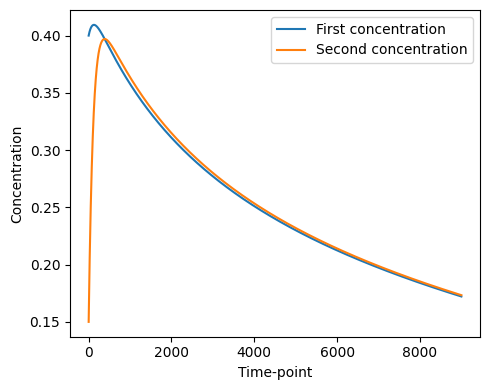

In [51]:
# Uncomment the following line if you have not computed yet A and I
A, I = answer_results(4, A=0.4, I=0.15, dt=dt, k=k, tau=tau, n=n)
plot_concentration_1cell(A, I)